# Chess-Bot
An implementation of DeepChess (paper in `docs/deepchess.pdf`) and its use in a chess engine
### Differences from the original DeepChess:
- Training of the Autoencoder uses BinaryCrossentropy as its loss function. It's unclear what is used in the paper, but I suspect MSE
- LeakyReLU instead of ReLU?

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import chessbot as cb

## Environment
Downloads, unpacks, processes, and splits training data  
Should this break, go to http://ccrl.chessdom.com/ccrl/4040/games.html and replace the variable in `chessbot/environment.py` with the updated no-comments game link

In [2]:
cb.environment.create()

Dataset archive file found at /home/wumphlett/personal/Chess-Bot/data/CCRL-4040.[1505357].pgn.7z
Dataset file found at /home/wumphlett/personal/Chess-Bot/data/CCRL-4040.[1505357].pgn
Dataset pkl files found at /home/wumphlett/personal/Chess-Bot/data
Dataset val pkl files found at /home/wumphlett/personal/Chess-Bot/data
Done


## Pos2Vec
The Pos2Vec dataset consists of 1mil positions each from white won and black won games  
Pos2Vec is trained using a greedy layer-by-layer strategy of an unsupervised autoencoder

In [3]:
train, val = cb.dataset.pos2vec_dataset()

In [4]:
pos2vec = cb.model.train_pos2vec(train, val)

Training layer 1/4
Epoch 1/50
40000/40000 [==============================] - 73s 2ms/step - loss: 0.2071 - val_loss: 0.0968 - lr: 0.0050
Epoch 2/50
40000/40000 [==============================] - 76s 2ms/step - loss: 0.0934 - val_loss: 0.0904 - lr: 0.0049
Epoch 3/50
40000/40000 [==============================] - 75s 2ms/step - loss: 0.0877 - val_loss: 0.0852 - lr: 0.0048
Epoch 4/50
40000/40000 [==============================] - 75s 2ms/step - loss: 0.0834 - val_loss: 0.0819 - lr: 0.0047
Epoch 5/50
40000/40000 [==============================] - 73s 2ms/step - loss: 0.0808 - val_loss: 0.0798 - lr: 0.0046
Epoch 6/50
40000/40000 [==============================] - 75s 2ms/step - loss: 0.0790 - val_loss: 0.0781 - lr: 0.0045
Epoch 7/50
40000/40000 [==============================] - 74s 2ms/step - loss: 0.0773 - val_loss: 0.0766 - lr: 0.0044
Epoch 8/50
40000/40000 [==============================] - 75s 2ms/step - loss: 0.0758 - val_loss: 0.0750 - lr: 0.0043
Epoch 9/50
40000/40000 [=============

40000/40000 [==============================] - 76s 2ms/step - loss: 0.0477 - val_loss: 0.0475 - lr: 0.0035
Epoch 20/50
40000/40000 [==============================] - 76s 2ms/step - loss: 0.0474 - val_loss: 0.0473 - lr: 0.0034
Epoch 21/50
40000/40000 [==============================] - 75s 2ms/step - loss: 0.0471 - val_loss: 0.0470 - lr: 0.0033
Epoch 22/50
40000/40000 [==============================] - 76s 2ms/step - loss: 0.0468 - val_loss: 0.0467 - lr: 0.0033
Epoch 23/50
40000/40000 [==============================] - 76s 2ms/step - loss: 0.0466 - val_loss: 0.0464 - lr: 0.0032
Epoch 24/50
40000/40000 [==============================] - 75s 2ms/step - loss: 0.0463 - val_loss: 0.0462 - lr: 0.0031
Epoch 25/50
40000/40000 [==============================] - 76s 2ms/step - loss: 0.0460 - val_loss: 0.0459 - lr: 0.0031
Epoch 26/50
40000/40000 [==============================] - 76s 2ms/step - loss: 0.0458 - val_loss: 0.0457 - lr: 0.0030
Epoch 27/50
40000/40000 [==============================] - 7

Epoch 38/50
40000/40000 [==============================] - 76s 2ms/step - loss: 0.0445 - val_loss: 0.0445 - lr: 0.0024
Epoch 39/50
40000/40000 [==============================] - 78s 2ms/step - loss: 0.0445 - val_loss: 0.0444 - lr: 0.0023
Epoch 40/50
40000/40000 [==============================] - 77s 2ms/step - loss: 0.0444 - val_loss: 0.0444 - lr: 0.0023
Epoch 41/50
40000/40000 [==============================] - 77s 2ms/step - loss: 0.0444 - val_loss: 0.0443 - lr: 0.0022
Epoch 42/50
40000/40000 [==============================] - 79s 2ms/step - loss: 0.0443 - val_loss: 0.0443 - lr: 0.0022
Epoch 43/50
40000/40000 [==============================] - 77s 2ms/step - loss: 0.0442 - val_loss: 0.0442 - lr: 0.0021
Epoch 44/50
40000/40000 [==============================] - 77s 2ms/step - loss: 0.0442 - val_loss: 0.0442 - lr: 0.0021
Epoch 45/50
40000/40000 [==============================] - 79s 2ms/step - loss: 0.0441 - val_loss: 0.0441 - lr: 0.0021
Epoch 46/50
40000/40000 [=======================

## DeepChess
The DeepChess dataset consists of 1mil position pairs randomly ordered  
DeepChess is trained using a shared Pos2Vec instance to perform feature extraction then fed into another neural net to determine which position is best

In [3]:
train, val = cb.dataset.deepchess_dataset()

In [7]:
deepchess = cb.model.train_deepchess(train, val)

Pos2Vec weights loading from /home/wumphlett/personal/Chess-Bot/models/pos2vec.h5
20000/20000 [==============================] - 51s 2ms/step - loss: 0.5704 - accuracy: 0.6857 - val_loss: 0.5475 - val_accuracy: 0.7190 - lr: 0.0100
DeepChess weights loading from /home/wumphlett/personal/Chess-Bot/models/deepchess.h5


## Evaluation

In [8]:
deepchess = cb.model.get_deepchess()
deepchess.evaluate(train)

DeepChess weights loading from /home/wumphlett/personal/Chess-Bot/models/deepchess.h5
20000/20000 [==============================] - 44s 2ms/step - loss: 0.5000 - accuracy: 0.7443


[0.500031054019928, 0.744333028793335]

In [12]:
deepchess.deepchess.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 dc_input_left (InputLayer)     [(None, 773)]        0           []                               
                                                                                                  
 dc_input_right (InputLayer)    [(None, 773)]        0           []                               
                                                                                                  
 pos2_vec (Pos2Vec)             (None, 100)          1403402     ['dc_input_left[0][0]',          
                                                                  'dc_input_right[0][0]']         
                                                                                                  
 concatenate (Concatenate)      (None, 200)          0           ['pos2_vec[0][0]',           

## Engine

In [25]:
engine = cb.engine.Engine(True)

DeepChess weights loading from /home/wumphlett/personal/Chess-Bot/models/deepchess.h5


In [27]:
move = engine.next_move()

In [ ]:
print(move)

## Play

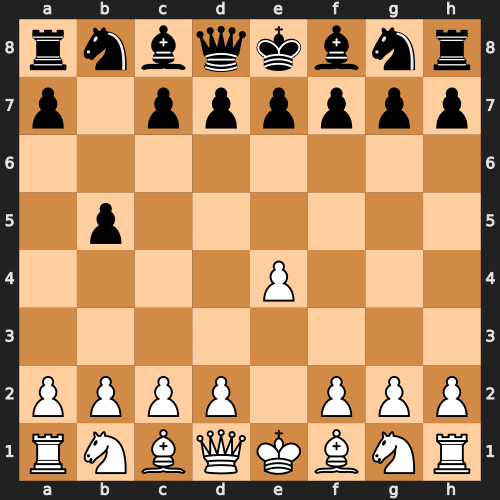

In [ ]:
from IPython.display import SVG, display, clear_output
import chess

PLAY_WHITE = True

engine = cb.engine.Engine(not PLAY_WHITE)
player_turn = not engine.play_white

while not engine.board.is_game_over():
    display(SVG(chess.svg.board(engine.board, orientation=not engine.play_white, size=500)))

    if player_turn:
        move = chess.Move.from_uci(input("Enter a move: "))
    else:
        print("Computer calculating...")
        move = engine.calculate_move()

    clear_output(wait=False)

    if not engine.board.is_pseudo_legal(move):
            continue

    player_turn = not player_turn
    engine.board.push(move)

display(SVG(chess.svg.board(engine.board, orientation=not engine.play_white, size=500)))
engine.board.outcome()

## Sandbox

In [ ]:
import numpy as np

train, val = cb.dataset.pos2vec_dataset()

In [ ]:
pos2vec = cb.model.get_pos2vec()

left = pos2vec.predict(np.reshape(train[0][0][0], (1, 773)))
right = pos2vec.predict(np.reshape(train[0][0][1], (1, 773))

print(left, right)

In [ ]:
import tensorflow as tf

tf.keras.layers.Concatenate(axis=1)([left, right]).numpy().shape